In [95]:
print("""\
# ****************************************************************************
#  FONCTIONS DE SAGEMATH
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,z> = PolynomialRing(QQ,3, order='lex')
f = 2*x^2*y+7*z^3

# Code pour l'EXERCICE

print(x<y^2)
print(f.lt())
print(f.lc())
print(f.lm())

reponse  ="""x est inférieur a y^2 car on utilise l'ordre lexicographique
Par ordre lexicographique, le terme en 2*x^2 est le plus grand car tous les autres n'ont pas de x dedans
Donc le coefficient domimant est 2 et le monôme dominant est x^2"""

# # Affichage des resultats

print("\n$1/ ", reponse)

reset()

# ****************************************************************************
#  FONCTIONS DE SAGEMATH
# ****************************************************************************

False
2*x^2*y
2
x^2*y

$1/  x est inférieur a y^2 car on utilise l'ordre lexicographique
Par ordre lexicographique, le terme en 2*x^2 est le plus grand car tous les autres n'ont pas de x dedans
Donc le coefficient domimant est 2 et le monôme dominant est x^2


In [96]:
print("""\
# ****************************************************************************
# DIVISION MULTIVARIEE
# ****************************************************************************
""")

# Donnees de l'enonce de l'exercice

MPol.<x,y> = PolynomialRing(QQ,2, order='lex')
f  = -x^7 + x^6*y + 2*x^5 - 2*x^4*y - 5*x^2 + 3*x*y^3 + 5*x*y + 11*y^3 + 10 
f1 = x*y^2+2*y^2
f2 = x^5+5

# Code pour l'EXERCICE

def testDiv(p,F):
    for i in range(len(F)):
        if F[i]!=0:
            if p.lt()%F[i].lt()==0 :
                return (True,i)
    return (False,-1)

def myDivision(f,F):
    MPol = f.parent()
    n = MPol.ngens()
    s = len(F)
    Q = [MPol(0)]*s
    r = MPol(0)
    p = f
    while p!=MPol(0) :
        b,i = testDiv(p,F)
        if b :
            Q[i]= Q[i]+p.lt()//F[i].lt()
            p = p - ((p.lt()//F[i].lt())*F[i])
        else :
            r = r + p.lt()
            p = p - p.lt()
    assert(f==sum(q*g for q,g in zip(Q,F) )+r)
    return Q,r

# # Affichage des resultats

print("\n$ ",  myDivision(f,[f1,f2]))

# ****************************************************************************
# DIVISION MULTIVARIEE
# ****************************************************************************


$  ([3*y, -x^2 + x*y + 2], -2*x^4*y + 5*y^3)


In [97]:
print("""\
# ****************************************************************************
# BASE DE GROEBNER
# ****************************************************************************
""")

# Donnees de l'enonce de l'exercice

MPol.<x,y,z> = PolynomialRing(QQ,3, order='lex')
f1 = x^2-y
f2 = x*y-z
f3 = z^4+x*y

# Code pour l'EXERCICE

def myGroebner(F):
    G=F.copy()
    S=[1]
    s = lambda g, h : (lcm(g.lt(),h.lt())//g.lt())*g - (lcm(g.lt(),h.lt())//h.lt())*h
    while S :
        S=[]
        for g in G :
            for h in G :
                r = s(g,h)
                _, r = myDivision(r,G)
                if r != 0 :
                    S+=[r]
        G+=S
    G=list(set(G))
    return G
         
def testIfRemovableElement(G):
    for i in range(len(G)):
        g = G[i]
        if g.lt() in Ideal([f.lt() for f in G if f!=g]) :
            return (True,i)
    return (False, -1)
        
    
def myRedGroebner(F):
    G=myGroebner(F)
    b, i = testIfRemovableElement(G)
    while b :
        G.pop(i)
        b, i = testIfRemovableElement(G)
    for i in range(len(G)) :
        G[i]=G[i]/G[i].lc()
    return G
    

def myRedGroebner2(F):
    G=myGroebner(F)
    for i in range(len(G)) :
        g=G[i]
        _, r = myDivision(g,[f for f in G if f!=g])
        if r!=0 :
            G[i]=r/r.lc()
        else:  
            G[i]=r
    i=0
    while i<len(G):
        if G[i]==0:
            G.pop(i)
        else :
            i+=1
    return G
    
# # Affichage des resultats

print("\n$1/ ",myGroebner([f1,f2,f3]))
print("\n$2/ ",myRedGroebner2([f1,f2,f3]))

# ****************************************************************************
# BASE DE GROEBNER
# ****************************************************************************


$1/  [-y^2*z^3 - y^2, x^2 - y, y^3 - z^2, -x*z + y^2, x*z^4 + y^2, x*y + z^4, y^2*z^3 + y^2, x*y - z, x*z - y^2, z^4 + z, -z^4 - z, -x*z^4 - y^2, -y^3 + z^2]

$2/  [x^2 - y, y^2*z^3 + y^2, x*y - z, x*z - y^2, z^4 + z, y^3 - z^2]


In [98]:
print("""\
# ****************************************************************************
# APPARTENANCE A UN IDEAL
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,z> = PolynomialRing(QQ,3, order='lex')
f1 = x*y-y^2
f2 = x^3-z^2
I = Ideal([f1,f2])
f = -4*x^2*y^2*z^2 + y^6 + 3*z^5

# Code pour l'EXERCICE

test1 = f in I
_, r = myDivision(f,I.groebner_basis())
test2 = (r==0) # A ECRIRE VOUS-MEME


# # Affichage des resultats

print("\n$ Test de Sage ",test1)
print("\n$ Test de personnel ",test2)

reset()

# ****************************************************************************
# APPARTENANCE A UN IDEAL
# ****************************************************************************


$ Test de Sage  False

$ Test de personnel  False


# ****************************************************************************
# RESOLUTION D'UN SYSTEME
# ****************************************************************************


$1/  Une base de Groebner de [f,g] est [x^2 - 5*x + y^2 - 5*y + 12, x*y^2 - 5*x*y + 6*x + y^3 - 6*y^2 + 11*y - 6, y^4 - 6*y^3 + 15*y^2 - 26*y + 24]

$2/  Les valeurs de y sont [3, 2]

$4/  Les valeurs de (x,y) sont [(2, 3), (3, 2), (3, 3), (2, 2)]

$4/


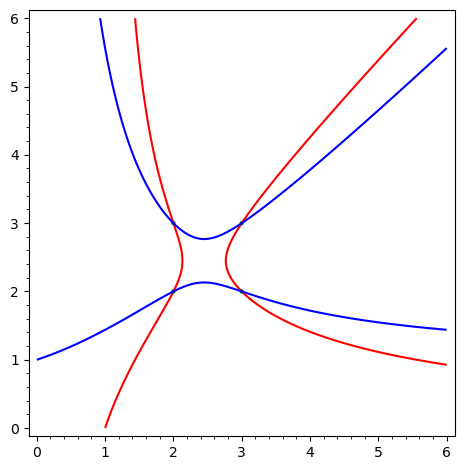

In [99]:
print("""\
# ****************************************************************************
# RESOLUTION D'UN SYSTEME
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice


MPol.<x,y> = PolynomialRing(QQ,2,order='lex') # QUEL ORDRE DEVEZ-VOUS CHOISIR ?
f = (y^2+6)*(x-1) - y*(x^2 + 1)
g = (x^2+6)*(y-1) - x*(y^2 + 1)
 

# Code pour l'EXERCICE

I = Ideal(f,g)

base = I.groebner_basis() # Vous pouvez utiliser la fonction adhoc de sage
                          # pour calculer la base Groebner
racines_y = [y for (y,_) in base[2].univariate_polynomial().roots()] 
racinesf = [(x,racines_y[0]) for (x,_) in f.subs({y:racines_y[0]}).univariate_polynomial().roots()]+ [(x,racines_y[1]) for (x,_) in f.subs({y:racines_y[1]}).univariate_polynomial().roots()]
racinesg = [(x,racines_y[0]) for (x,_) in g.subs({y:racines_y[0]}).univariate_polynomial().roots()]+ [(x,racines_y[1]) for (x,_) in g.subs({y:racines_y[1]}).univariate_polynomial().roots()]
racinesf = set(racinesf)
racinesg = set(racinesg)
racines  = [(x,y) for (x,y) in racinesf if (x,y) in racinesg]

Gf = implicit_plot(f,(x,0,6),(y,0,6),color='red') 
Gg = implicit_plot(g,(x,0,6),(y,0,6),color='blue')  
Gp = point2d(racines,color='green')

# # Affichage des resultats

print("\n$1/  Une base de Groebner de [f,g] est", base)
print("\n$2/  Les valeurs de y sont", racines_y)
print("\n$4/  Les valeurs de (x,y) sont", racines)
print("\n$4/")
show(Gf+Gg+Gp)

reset()

In [101]:
print("""\
# ****************************************************************************
# OPTIMISATION
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice


MPol.<x,y,lamb> = PolynomialRing(QQ,3,order='lex') # QUEL ORDRE DEVEZ-VOUS CHOISIR ?
f = x^2*y  - 2*x*y + y + 1
g = x^2 + y^2 - 1


# Code pour l'EXERCICE

gradf = vector(MPol,[f.derivative(x),f.derivative(y)])
gradg = vector(MPol,[lamb*g.derivative(x),lamb*g.derivative(y)])

print(gradf, gradg)

syst = [gradg[0]-gradf[0],gradg[1]-gradf[1],g]
I = Ideal(syst)
base = I.groebner_basis()
lamb_possibles = [lamb  for (lamb,_) in base[3].univariate_polynomial().roots(RR) if lamb!=0]
y_possibles1 = [(yy,l) for l in lamb_possibles for yy,_ in base[2].subs({lamb:l}).univariate_polynomial().roots(RR)]
y_possibles2 = [(yy,l) for l in lamb_possibles for yy,_ in base[1].subs({lamb:l}).univariate_polynomial().roots(RR)]
# on constate qu'on obtient numériquement les mêmes racines donc on garde y_possibles1
racines=[(xx,yy) for (yy,l) in y_possibles1 for xx,_ in base[0].subs({lamb:l,y:yy}).univariate_polynomial().roots(RR)]
print("\n$1/  On doit resoudre le systeme", syst)
print("\n$2/  dont une base de Groebner est", base)
print("\n$4/  Les valeurs de (x,y) sont", racines)





reset()

# ****************************************************************************
# OPTIMISATION
# ****************************************************************************

(2*x*y - 2*y, x^2 - 2*x + 1) (2*x*lamb, 2*y*lamb)

$1/  On doit resoudre le systeme [-2*x*y + 2*x*lamb + 2*y, -x^2 + 2*x + 2*y*lamb - 1, x^2 + y^2 - 1]

$2/  dont une base de Groebner est [x + 1/2*y^2 + 2/5*lamb^2 - 1, y^3 - 16/25*lamb^3 + 2*lamb, y*lamb - 2/5*lamb^2, lamb^4 - 125/36*lamb^2]

$4/  Les valeurs de (x,y) sont [(-0.666666666666667, -0.745355992499930), (-0.666666666666667, 0.745355992499930)]


In [102]:
MPol.<x,y,lamb> = PolynomialRing(QQ,3,order='lex')
f = x^2*y  - 2*x*y + y + 1
g = x^2 + y^2 - 1

# Code pour l'EXERCICE

gradf = vector(MPol,[f.derivative(x),f.derivative(y)])
gradg = vector(MPol,[lamb*g.derivative(x),lamb*g.derivative(y)])

print(gradf, gradg)

syst = [gradg[0]-gradf[0],gradg[1]-gradf[1],g]
I = Ideal(syst)
base = I.groebner_basis()
print(x^2+45*x*y in I)µ

SyntaxError: invalid syntax (1215659594.py, line 15)

In [140]:
print("""\
# ****************************************************************************
# MANIPULATIONS ALGEBRIQUES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

# Code pour l'EXERCICE
MPol.<x,y,u,v> = PolynomialRing(QQ,4,order='degrevlex')
# x represente cos(theta), y represente sin(theta)
f1=x+y - u
f2=x^2 - y^2 + 2*x*y - v
f3= x^2 + y^2 - 1
I = Ideal(f1,f2,f3)
formule = I.reduce(y^6)
# # Affichage des resultats

print("\n$1/ ", formule)

reset()

# ****************************************************************************
# MANIPULATIONS ALGEBRIQUES
# ****************************************************************************

1/16*u^2*v^2 - 3/8*u^2*v + 7/16*u^2 + 1/8*v^2 - 1/8*v - 1/8

$1/ 


# ****************************************************************************
# OVALES DE DESCARTES
# ****************************************************************************


$ L'équation est  y^4 + 2*x^2*y^2 - 16/3*x*y^2 - 22/3*y^2 + x^4 - 16/3*x^3 - 2/9*x^2 + 80/9*x + 25/9


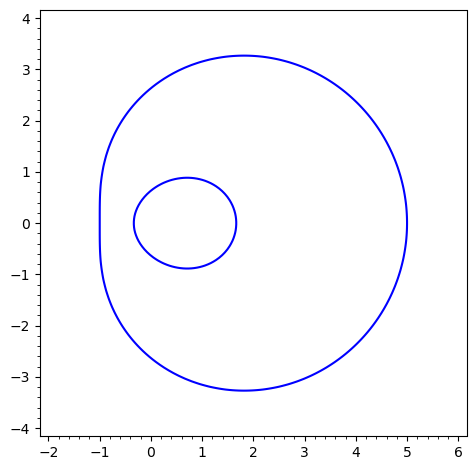

In [132]:
print("""\
# ****************************************************************************
# OVALES DE DESCARTES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,w,z> = PolynomialRing(QQ,4,order='invlex')
f1 = w+2*z-3
f2 = w^2 - (x^2 + y^2)
f3 = z^2 - ((x-1)^2 + y^2)
I = Ideal(f1,f2,f3)
base = I.groebner_basis()
# Code pour l'EXERCICE

eq = base[-1]

# # Affichage des resultats

MPol2.<x,y> = PolynomialRing(QQ,2,order='lex')

print("\n$ L'équation est ",eq)
implicit_plot(MPol2(eq),(x,-2,6),(y,-4,4))